In [18]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import datetime
import holidays
import seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from scipy import interpolate
quotes = pd.read_excel('treasury_quotes_2022-09-30.xlsx', 'quotes')
quotes.set_index('kytreasno')

,kycrspid_x,caldt,tdbid,tdask,tdnomprc,tdnomprc_flg,tdsourcr,tdaccint,tdretnua,tdyld,...,tfcaldt,tnotice,iymcn,itype,iuniq,itax,iflwr,tbankdt,tstripelig,tfrgntgt
kytreasno,,,,,,,,,,,,,,,,,,,,,
204090,20270815.106370,2022-09-30,109.726562,109.773438,109.750000,M,I,0.796875,-0.002944,0.000112,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204082,20230815.106250,2022-09-30,101.703125,101.734375,101.718750,M,I,0.781250,-0.000824,0.000115,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204080,20221115.107620,2022-09-30,100.500000,100.531250,100.515625,M,I,2.859375,-0.000480,0.000092,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204081,20230215.107120,2022-09-30,101.304688,101.335938,101.320312,M,I,0.890625,0.000189,0.000095,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204083,20241115.107500,2022-09-30,106.359375,106.390625,106.375000,M,I,2.812500,-0.002027,0.000117,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207947,20270930.204120,2022-09-30,100.125000,100.171875,100.148438,M,I,0.000000,-0.003304,0.000111,...,NaN,0,NaN,2,0,1,1,NaN,NaN,NaN
207944,20231005.400000,2022-09-30,95.796389,95.960833,95.878611,M,I,0.000000,0.000009,0.000114,...,NaN,0,NaN,4,0,1,1,NaN,NaN,NaN
207948,20290930.203870,2022-09-30,99.312500,99.359375,99.335938,M,I,0.000000,-0.003527,0.000108,...,NaN,0,NaN,2,0,1,1,NaN,NaN,NaN


In [3]:
#Filter out TIPS - type 11 and type 12
fil_quotes = quotes[quotes.itype != 11]
fil_quotes = fil_quotes[fil_quotes.itype != 12]
fil_quotes.set_index('kytreasno')

,kycrspid_x,caldt,tdbid,tdask,tdnomprc,tdnomprc_flg,tdsourcr,tdaccint,tdretnua,tdyld,...,tfcaldt,tnotice,iymcn,itype,iuniq,itax,iflwr,tbankdt,tstripelig,tfrgntgt
kytreasno,,,,,,,,,,,,,,,,,,,,,
204090,20270815.106370,2022-09-30,109.726562,109.773438,109.750000,M,I,0.796875,-0.002944,0.000112,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204082,20230815.106250,2022-09-30,101.703125,101.734375,101.718750,M,I,0.781250,-0.000824,0.000115,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204080,20221115.107620,2022-09-30,100.500000,100.531250,100.515625,M,I,2.859375,-0.000480,0.000092,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204081,20230215.107120,2022-09-30,101.304688,101.335938,101.320312,M,I,0.890625,0.000189,0.000095,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
204083,20241115.107500,2022-09-30,106.359375,106.390625,106.375000,M,I,2.812500,-0.002027,0.000117,...,NaN,0,NaN,1,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207947,20270930.204120,2022-09-30,100.125000,100.171875,100.148438,M,I,0.000000,-0.003304,0.000111,...,NaN,0,NaN,2,0,1,1,NaN,NaN,NaN
207944,20231005.400000,2022-09-30,95.796389,95.960833,95.878611,M,I,0.000000,0.000009,0.000114,...,NaN,0,NaN,4,0,1,1,NaN,NaN,NaN
207948,20290930.203870,2022-09-30,99.312500,99.359375,99.335938,M,I,0.000000,-0.003527,0.000108,...,NaN,0,NaN,2,0,1,1,NaN,NaN,NaN


## Problem 1

1.1 Time to maturity

In [4]:
def maturity(issue, expiry):
    #df['issue'] = pd.to_datetime(df['issue'])
    #df['expiry'] = pd.to_datetime(df['expiry'])
    time_to_mat=(expiry-issue)/365.25
    time_to_mat.to_frame()
    return time_to_mat.dt.days

In [5]:
df=maturity(fil_quotes['tdatdt'], fil_quotes['tmatdt'])
maturity=fil_quotes.join(pd.DataFrame(df)).fillna(method='ffill')
maturity.rename(columns={0:'maturity'}, inplace=True )
maturity[['kytreasno','maturity']]

,kytreasno,maturity
0,204090,29
1,204082,29
2,204080,29
3,204081,29
4,204083,30
...,...,...
422,207947,4
423,207944,0
424,207948,7
425,207945,2


The bonds range from a maturity of ~30 to ~4 months.

1.2 Prices

In [6]:
def prices(bid, ask, accrued_interest):
    price=(0.5*(bid+ask))+accrued_interest
    return price

In [7]:
df1=prices(fil_quotes['tdbid'],fil_quotes['tdask'],fil_quotes['tdaccint'])
prices=maturity.join(pd.DataFrame(df1)).fillna(method='ffill')
prices.rename(columns={0:'price'}, inplace=True )
prices[['kytreasno','price']]

,kytreasno,price
0,204090,110.546875
1,204082,102.500000
2,204080,103.375000
3,204081,102.210938
4,204083,109.187500
...,...,...
422,207947,100.148438
423,207944,95.878611
424,207948,99.335938
425,207945,99.939453


1.3 YTM

In [8]:
def yieldtomat(face_value,bid, ask, maturity, coupon_payment):
    mid=(bid+ask)/2
    ytm = ((coupon_payment + (face_value-mid)/ maturity)) / ((face_value + mid)/2)*100
    return ytm

In [9]:
df2=yieldtomat(100, prices['tdbid'], prices['tdask'], prices['maturity'], prices['tcouprt'])
ytm=prices.join(pd.DataFrame(df2)).fillna(method='ffill')
ytm.rename(columns={0:'YTM'}, inplace=True )
ytm[['kytreasno','YTM']]

,kytreasno,YTM
0,204090,5.758086
1,204082,6.137984
2,204080,7.587658
3,204081,7.033043
4,204083,7.062386
...,...,...
422,207947,4.084859
423,207944,inf
424,207948,3.983091
425,207945,4.281570


1.4 Summary table

In [10]:
def bidask(bid, ask):
    spread = ask-bid    
    return spread

In [11]:
df3=bidask(prices['tdbid'], prices['tdask'])
bidask=ytm.join(pd.DataFrame(df3)).fillna(method='ffill')
bidask.rename(columns={0:'bid-ask'}, inplace=True )
#need to add TDYTM but could not find it in the given sheet
disp=bidask[['kytreasno','maturity','price','tcouprt','YTM','bid-ask']]

In [12]:
disp.describe()

,kytreasno,maturity,price,tcouprt,YTM,bid-ask
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,207246.552910,10.042328,93.605188,1.886905,inf,0.039184
std,927.219822,10.594944,9.119944,1.594043,NaN,0.021349
min,204080.000000,0.000000,56.304688,0.000000,0.359797,0.000111
25%,207094.250000,3.000000,88.692383,0.406250,3.017583,0.031250
50%,207546.500000,6.000000,96.023268,1.750000,3.705239,0.039062
75%,207819.750000,10.000000,98.933016,2.750000,4.176292,0.046875
max,207948.000000,30.000000,117.296875,7.625000,inf,0.164444


In [13]:
disp

,kytreasno,maturity,price,tcouprt,YTM,bid-ask
0,204090,29,110.546875,6.375,5.758086,0.046875
1,204082,29,102.500000,6.250,6.137984,0.031250
2,204080,29,103.375000,7.625,7.587658,0.031250
3,204081,29,102.210938,7.125,7.033043,0.031250
4,204083,30,109.187500,7.500,7.062386,0.031250
...,...,...,...,...,...,...
422,207947,4,100.148438,4.125,4.084859,0.046875
423,207944,0,95.878611,0.000,inf,0.164444
424,207948,7,99.335938,3.875,3.983091,0.046875
425,207945,2,99.939453,4.250,4.281570,0.035156


1.5 Scatter plot

<AxesSubplot:xlabel='maturity', ylabel='price'>

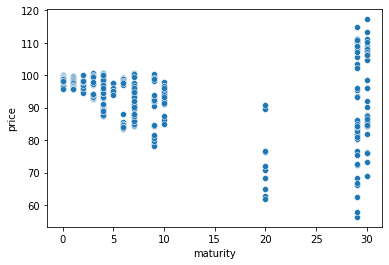

In [20]:

seaborn.scatterplot(data=disp, x=disp['maturity'], y=disp['price'])

1.6 Bad data

In [22]:
#PENDING not sure where TDYTM is in the data file

## Problem 2